In [2]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 7.4MB/s 
     |████████████████████████████████| 8.7MB 29.2MB/s 
     |████████████████████████████████| 2.1MB 38.6MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21


In [3]:
import plotly.express as px 
import pandas as pd 
import numpy as np 
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')
import datetime
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings("ignore") # Don't want to see the warnings in the notebook
from sklearn import svm
import itertools 

import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import pmdarima as pm

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

from __future__ import absolute_import,division,print_function,unicode_literals

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime

import pandas as pd


mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['axes.grid'] = False

import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

from statsmodels.tsa import stattools
from statsmodels.tsa import seasonal

from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
print("Import Succesfull")

Import Succesfull


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Get some data
df = pd.read_excel("/content/drive/My Drive/Colab Notebooks/Tomato/DelhiTomato.xlsx",index_col=0)

In [6]:
df.head()

,Date,DELHI_RetailPrice,DELHI_Volume,DELHI _Avg. Temperature
0,2015-01-01,3285.0,15850.0,14.2
1,2015-02-01,3135.0,15178.0,16.9
2,2015-03-01,2913.0,14104.0,22.6
3,2015-04-01,3283.0,13692.0,28.4
4,2015-05-01,3772.0,9535.0,33.3


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67 entries, 0 to 66
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     67 non-null     datetime64[ns]
 1   DELHI_RetailPrice        67 non-null     float64       
 2   DELHI_Volume             67 non-null     float64       
 3   DELHI _Avg. Temperature  67 non-null     float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 2.6 KB


#  Prediction Models

In [8]:
print(df.index)

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66],
           dtype='int64')


In [9]:
datetime_series = pd.to_datetime(df['Date'])

# create datetime index passing the datetime series
datetime_index = pd.DatetimeIndex(datetime_series.values)

df5=df.set_index(datetime_index)

# we don't need the column anymore
df5.drop('Date',axis=1,inplace=True)

print(df5.index)

DatetimeIndex(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
      

In [10]:
col = ['DELHI_RetailPrice','DELHI_Volume','DELHI _Avg. Temperature']
df5 = df5[col]
df5.head()

,DELHI_RetailPrice,DELHI_Volume,DELHI _Avg. Temperature
2015-01-01,3285.0,15850.0,14.2
2015-02-01,3135.0,15178.0,16.9
2015-03-01,2913.0,14104.0,22.6
2015-04-01,3283.0,13692.0,28.4
2015-05-01,3772.0,9535.0,33.3


In [11]:
from sklearn.model_selection import train_test_split

X = df5.drop(['DELHI_RetailPrice'], axis=1)
#print('X columns: %s' % list(X.columns))

y = df5['DELHI_RetailPrice']

#X = np.array(X).reshape(-1,len(X.columns)) # Reshape to required dimensions for sklearn
#y = np.array(y).reshape(-1,1)

train_size = 0.7

split_index = int(df5.shape[0]*train_size) # the index at which to split df into train and test

X_train = X[:split_index]
y_train = y[:split_index]

X_test = X[split_index:]
y_test = y[split_index:]

# 5. Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression

LinReg = LinearRegression()
LinReg.fit(X_train,y_train)

print ("R2 of Linear Regresson:", LinReg.score(X_train,y_train) )

R2 of Linear Regresson: 0.4178558110137791


In [13]:
print('MAE: ',metrics.mean_absolute_error(y_test, LinReg.predict(X_test)))
print('MSE: ',metrics.mean_squared_error(y_test, LinReg.predict(X_test)))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, LinReg.predict(X_test))))

MAE:  1304.4369345353782
MSE:  3065797.692374756
RMSE: 1750.941944318759


In [14]:
# we can confirm the R2 value (moreover, get the R2 Adj.value) of the model by statsmodels library of python
import statsmodels.api as sm
X_train = sm.add_constant(X_train) # adding a constant
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      DELHI_RetailPrice   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     15.43
Date:                Sun, 13 Sep 2020   Prob (F-statistic):           8.87e-06
Time:                        12:04:48   Log-Likelihood:                -382.83
No. Observations:                  46   AIC:                             771.7
Df Residuals:                      43   BIC:                             777.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1

In [15]:
from sklearn import neighbors
from math import sqrt

Knn = neighbors.KNeighborsRegressor(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='distance')
Knn.fit(X_train, y_train) 

KNeighborsRegressor(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='distance')

In [16]:
Knn.score(X_train, y_train)  # R2 of the KNN model

1.0

# 10. Tensor flow Multivariate

In [17]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [18]:
date_time = pd.to_datetime(df.pop('Date'), format='%d.%m.%Y')

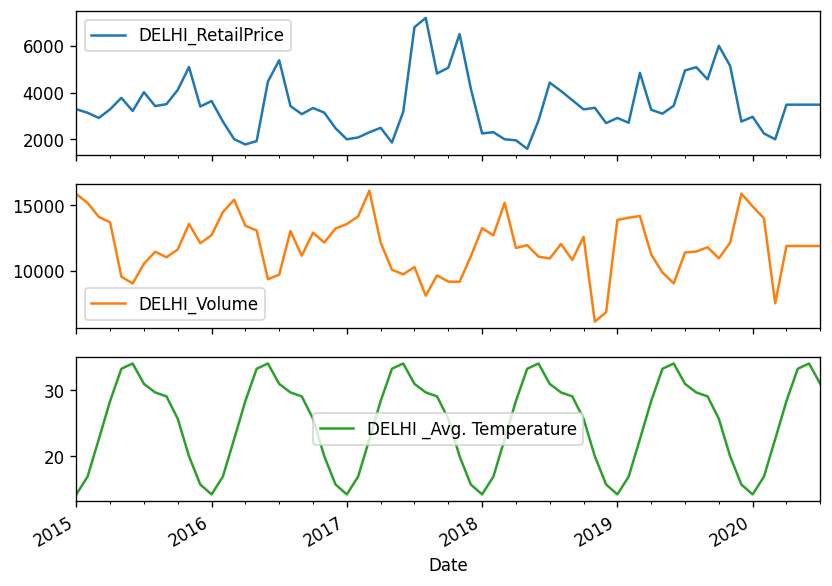

In [19]:
plot_cols = ['DELHI_RetailPrice', 'DELHI_Volume', 'DELHI _Avg. Temperature']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

Text(0, 0.5, 'DELHI _Avg. Temperature')

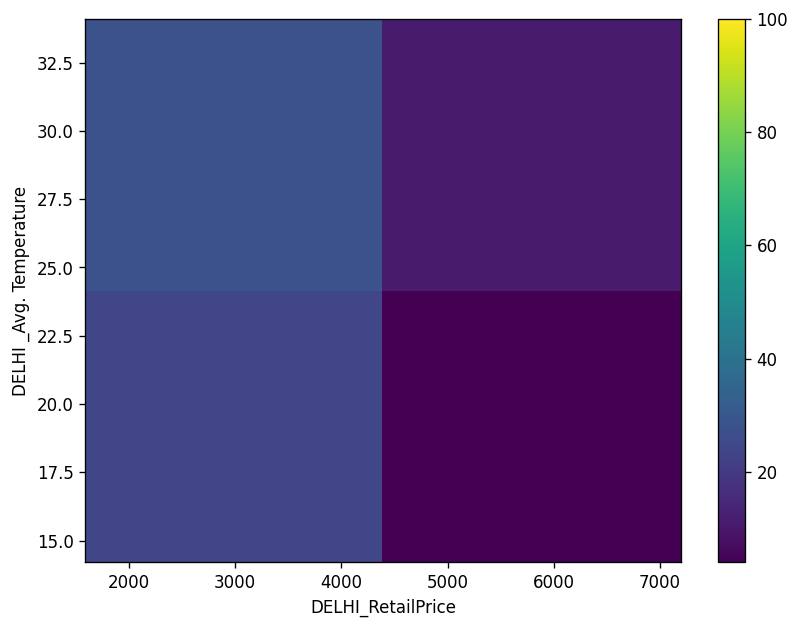

In [20]:
plt.hist2d(df['DELHI_RetailPrice'], df['DELHI _Avg. Temperature'], bins=(2, 2), vmax=100)
plt.colorbar()
plt.xlabel('DELHI_RetailPrice')
plt.ylabel('DELHI _Avg. Temperature')

In [21]:
timestamp_s = date_time.map(datetime.datetime.timestamp)

In [22]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

In [23]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

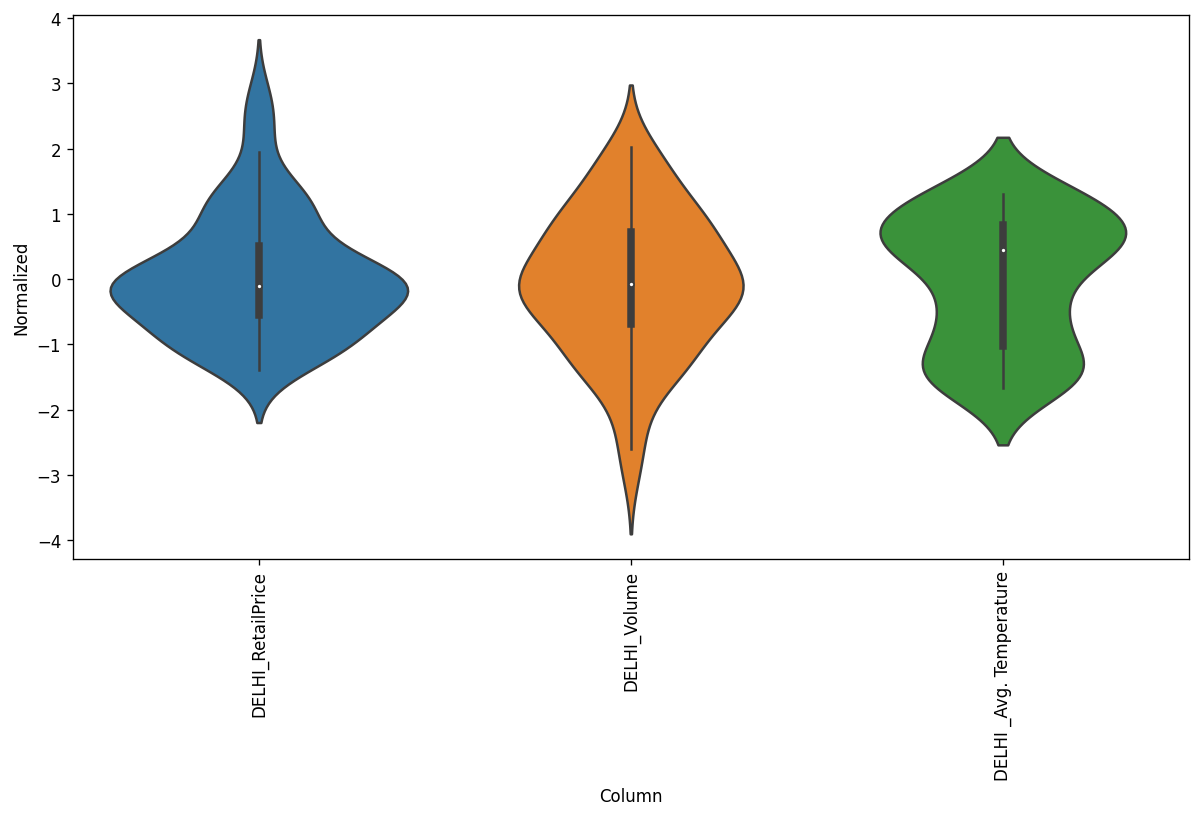

In [24]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

In [25]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [26]:
w1 = WindowGenerator(input_width=34, label_width=33, shift=1,
                     label_columns=['DELHI_RetailPrice'])
w1

Total window size: 35
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33]
Label indices: [ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34]
Label column name(s): ['DELHI_RetailPrice']

In [27]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [28]:
# Stack three slices, the length of the total window:
example_window = tf.stack([np.array(train_df[:w1.total_window_size])])


example_inputs, example_labels = w1.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (1, 35, 3)
Inputs shape: (1, 34, 3)
labels shape: (1, 33, 1)


In [29]:
w1.example = example_inputs, example_labels

In [30]:
def plot(self, model=None, plot_col='DELHI_RetailPrice', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(3, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Date')

WindowGenerator.plot = plot

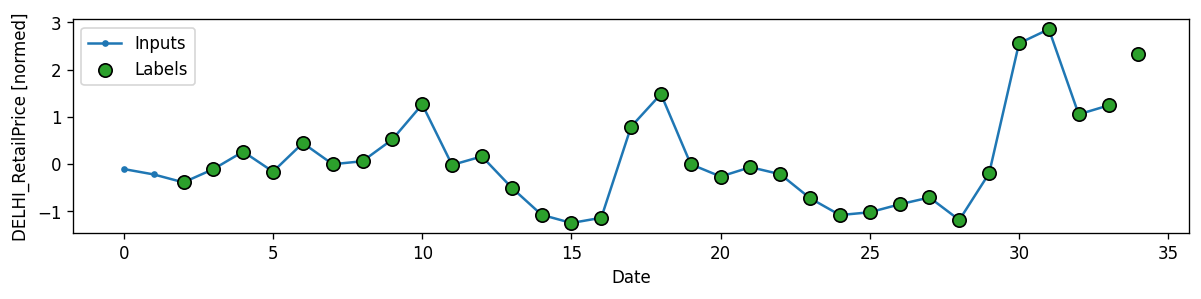

In [31]:
w1.plot()

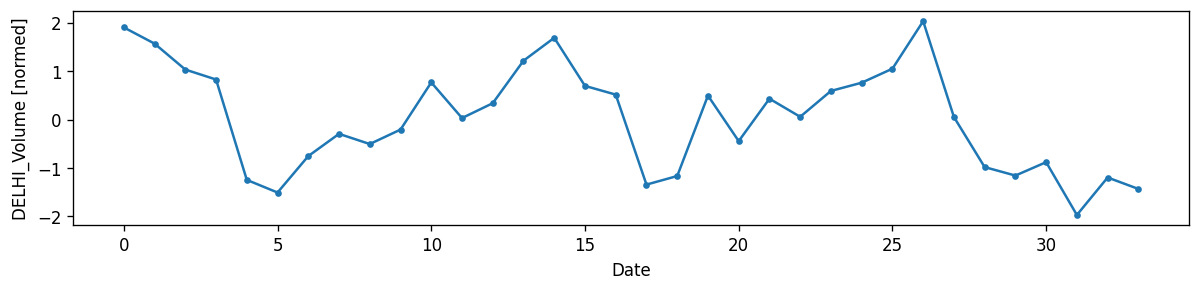

In [32]:
w1.plot(plot_col='DELHI_Volume')

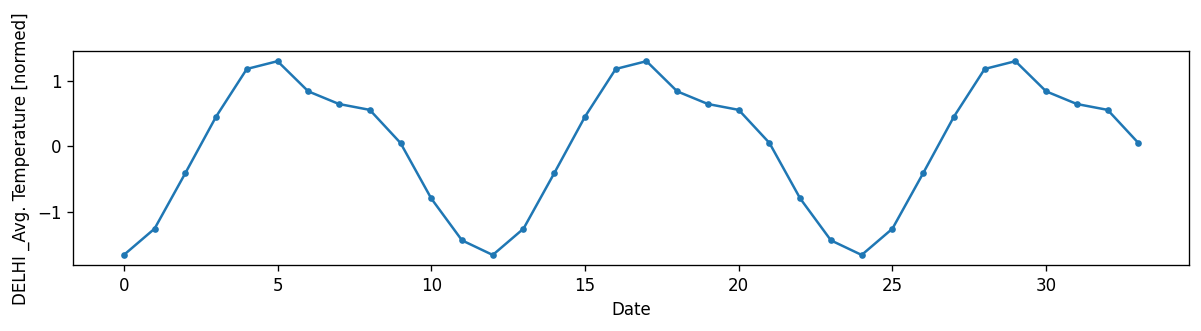

In [33]:
w1.plot(plot_col='DELHI _Avg. Temperature')

In [34]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [35]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [36]:
# Each element is an (inputs, label) pair
w1.train.element_spec

(TensorSpec(shape=(None, 34, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 33, 1), dtype=tf.float32, name=None))

In [37]:
for example_inputs, example_labels in w1.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (12, 34, 3)
Labels shape (batch, time, features): (12, 33, 1)


In [38]:
# single step models
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['DELHI_RetailPrice'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['DELHI_RetailPrice']

In [39]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 3)
Labels shape (batch, time, features): (32, 1, 1)


In [40]:
# baseline
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [41]:
baseline = Baseline(label_index=column_indices['DELHI_RetailPrice'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

1/1 [==============================] - 0s 2ms/step - loss: 0.8273 - mean_absolute_error: 0.7076


In [42]:
wide_window = WindowGenerator(
    input_width=3, label_width=3, shift=1,
    label_columns=['DELHI_RetailPrice'])

wide_window

Total window size: 4
Input indices: [0 1 2]
Label indices: [1 2 3]
Label column name(s): ['DELHI_RetailPrice']

In [43]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', baseline(single_step_window.example[0]).shape)

Input shape: (32, 1, 3)
Output shape: (32, 1, 1)


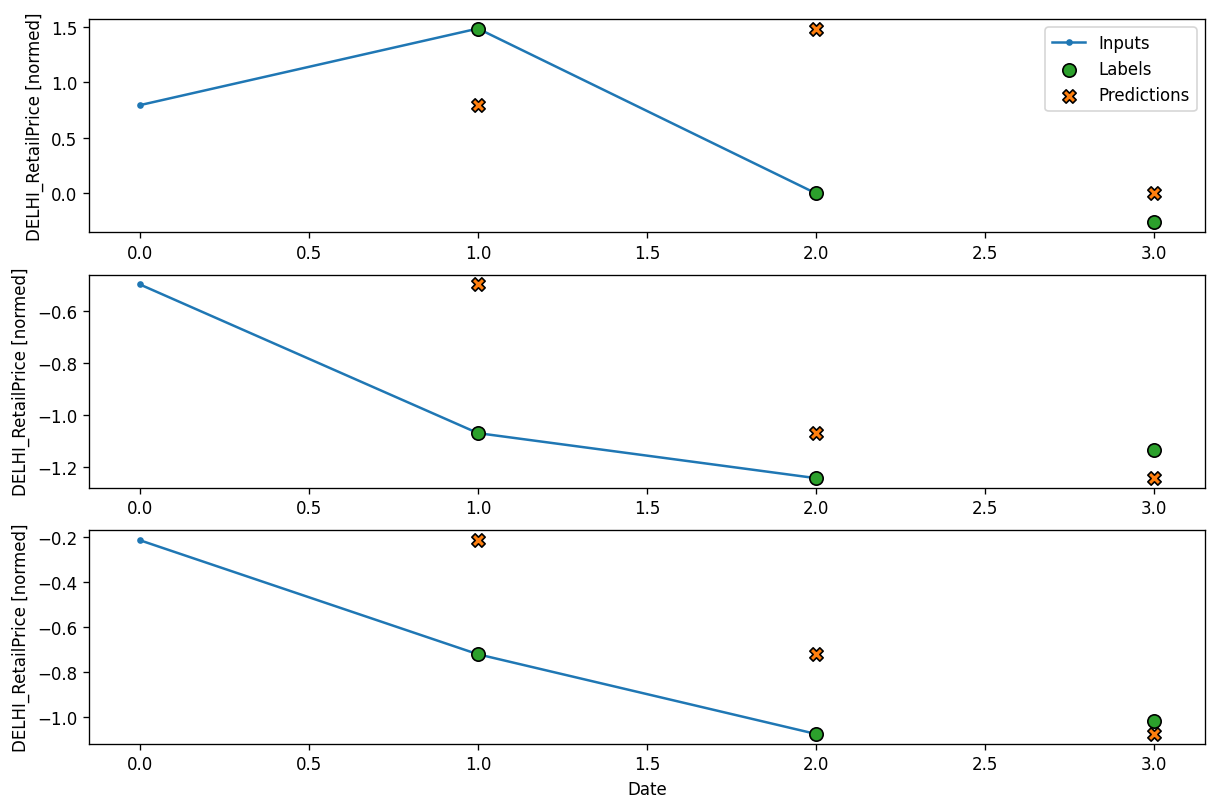

In [44]:
wide_window.plot(baseline)

In [45]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [46]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

Input shape: (32, 1, 3)
Output shape: (32, 1, 1)


In [47]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [48]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
2/2 [==============================] - 0s 70ms/step - loss: 3.2182 - mean_absolute_error: 1.5225 - val_loss: 2.5921 - val_mean_absolute_error: 1.2596
Epoch 2/20
2/2 [==============================] - 0s 29ms/step - loss: 3.2063 - mean_absolute_error: 1.5191 - val_loss: 2.5839 - val_mean_absolute_error: 1.2564
Epoch 3/20
2/2 [==============================] - 0s 25ms/step - loss: 3.1939 - mean_absolute_error: 1.5155 - val_loss: 2.5756 - val_mean_absolute_error: 1.2532
Epoch 4/20
2/2 [==============================] - 0s 26ms/step - loss: 3.1819 - mean_absolute_error: 1.5121 - val_loss: 2.5672 - val_mean_absolute_error: 1.2499
Epoch 5/20
2/2 [==============================] - 0s 27ms/step - loss: 3.1698 - mean_absolute_error: 1.5087 - val_loss: 2.5590 - val_mean_absolute_error: 1.2467
Epoch 6/20
2/2 [==============================] - 0s 28ms/step - loss: 3.1565 - mean_absolute_error: 1.5050 - val_loss: 2.5509 - val_mean_absolute_error: 1.2437
Epoch 7/20
2/2 [==================

In [49]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 3, 3)
Output shape: (32, 3, 1)


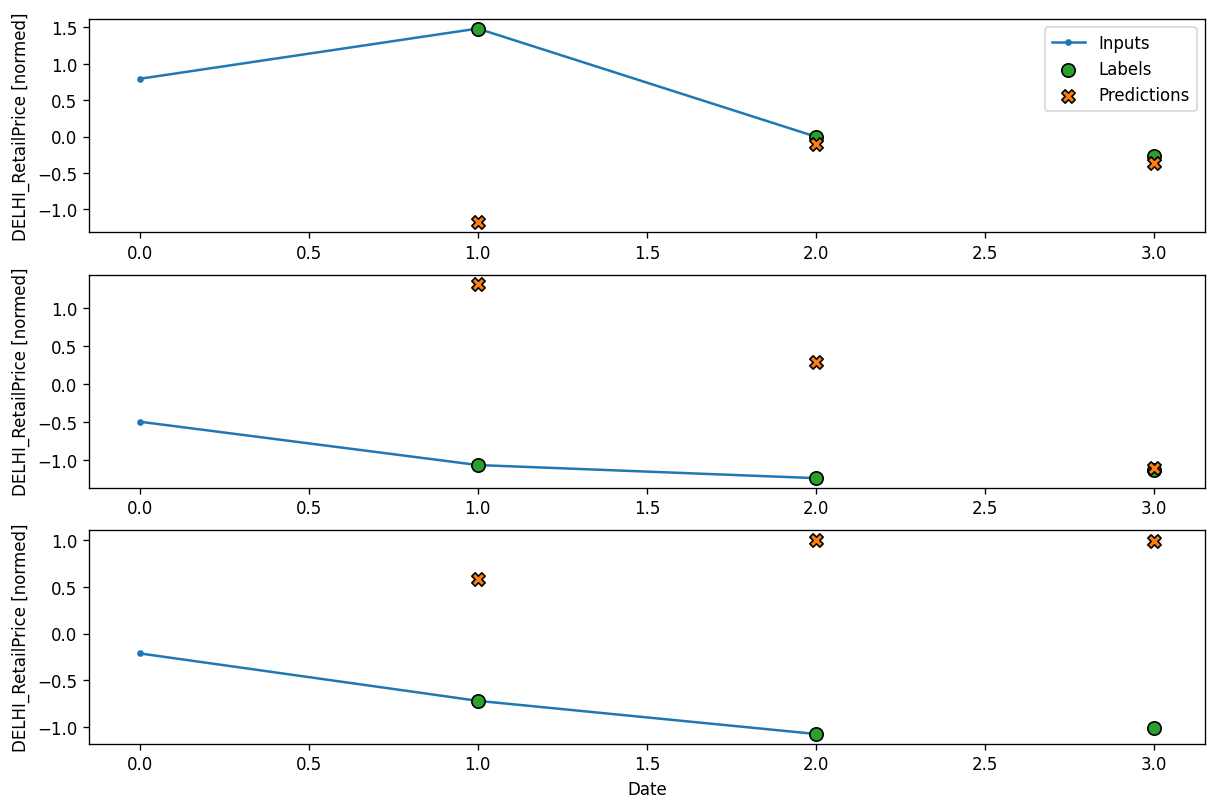

In [50]:
wide_window.plot(linear)

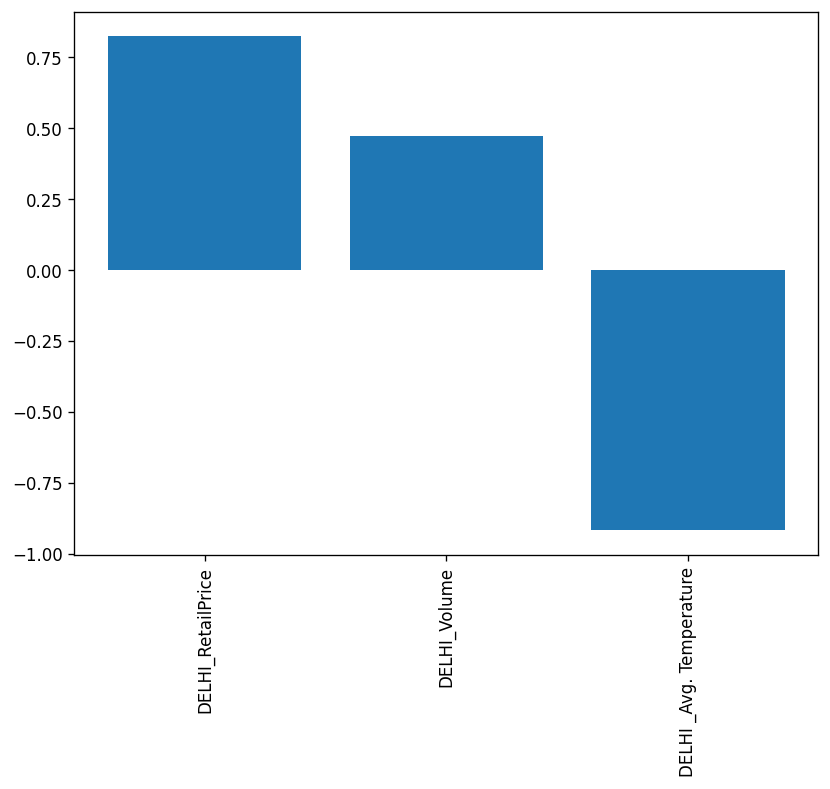

In [51]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

In [52]:
#dense
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
2/2 [==============================] - 0s 99ms/step - loss: 1.1695 - mean_absolute_error: 0.8269 - val_loss: 0.9368 - val_mean_absolute_error: 0.7447
Epoch 2/20
2/2 [==============================] - 0s 27ms/step - loss: 1.0269 - mean_absolute_error: 0.7652 - val_loss: 0.8664 - val_mean_absolute_error: 0.7176
Epoch 3/20
2/2 [==============================] - 0s 29ms/step - loss: 0.9048 - mean_absolute_error: 0.7070 - val_loss: 0.8099 - val_mean_absolute_error: 0.7002
Epoch 4/20
2/2 [==============================] - 0s 26ms/step - loss: 0.7972 - mean_absolute_error: 0.6561 - val_loss: 0.7615 - val_mean_absolute_error: 0.6818
Epoch 5/20
2/2 [==============================] - 0s 26ms/step - loss: 0.7159 - mean_absolute_error: 0.6209 - val_loss: 0.7212 - val_mean_absolute_error: 0.6623
Epoch 6/20
2/2 [==============================] - 0s 26ms/step - loss: 0.6412 - mean_absolute_error: 0.5797 - val_loss: 0.6918 - val_mean_absolute_error: 0.6539
Epoch 7/20
2/2 [==================

In [53]:
#multistep dense
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['DELHI_RetailPrice'])

conv_window

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['DELHI_RetailPrice']

Text(0.5, 1.0, 'input, predict  into the future.')

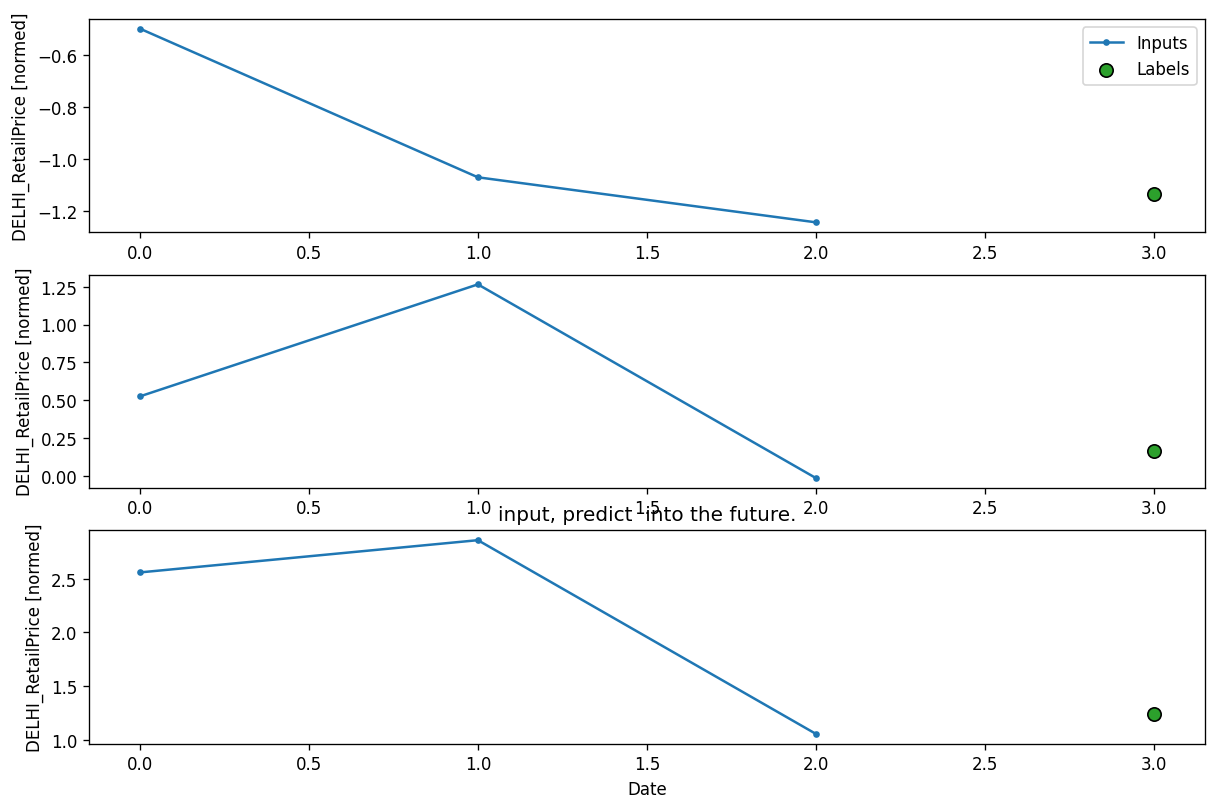

In [54]:
conv_window.plot()
plt.title("input, predict  into the future.")

In [55]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [56]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)

Input shape: (32, 3, 3)
Output shape: (32, 1, 1)


In [57]:
history = compile_and_fit(multi_step_dense, conv_window)

IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)

1/1 [==============================] - 0s 2ms/step - loss: 0.8919 - mean_absolute_error: 0.8271


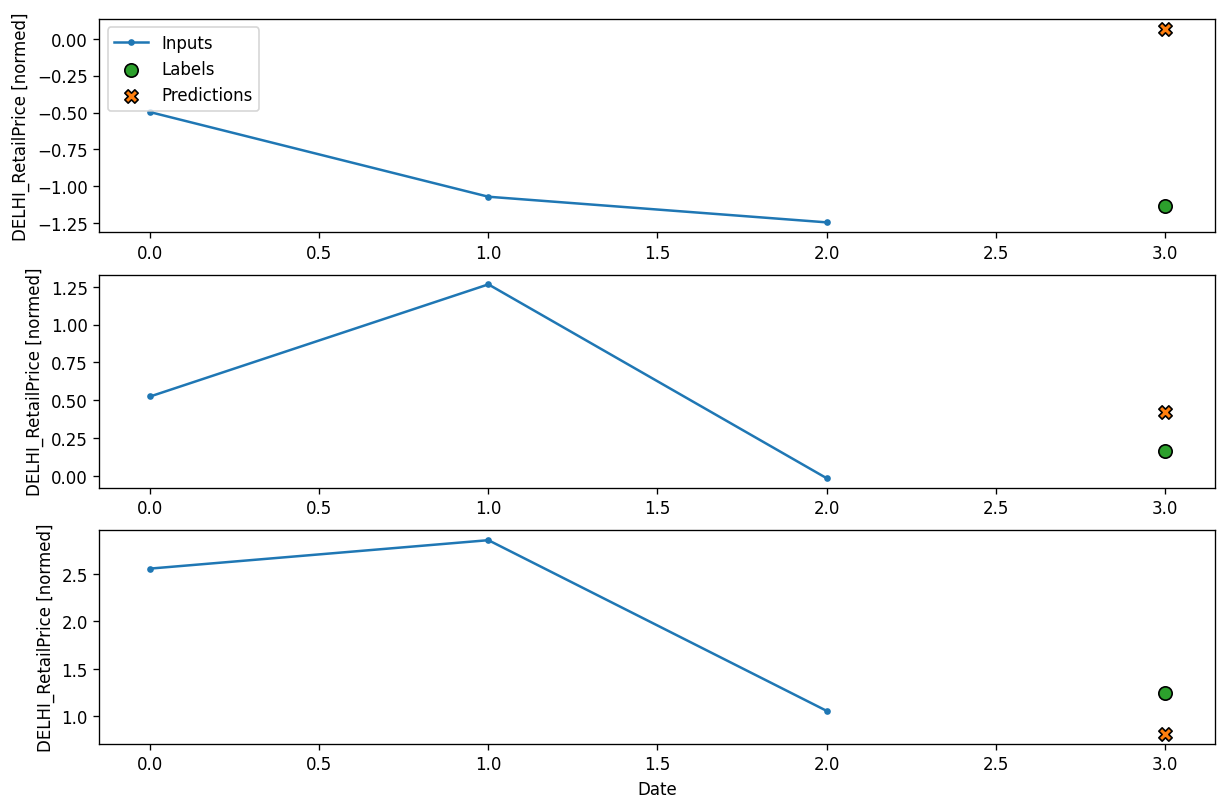

In [58]:
conv_window.plot(multi_step_dense)

In [59]:
print('Input shape:', wide_window.example[0].shape)
try:
  print('Output shape:', multi_step_dense(wide_window.example[0]).shape)
except Exception as e:
  print(f'\n{type(e).__name__}:{e}')

Input shape: (32, 3, 3)
Output shape: (32, 1, 1)


In [60]:
# CNN

conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [61]:
print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)

Conv model on `conv_window`
Input shape: (32, 3, 3)
Output shape: (32, 1, 1)


In [62]:
history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

1/1 [==============================] - 0s 2ms/step - loss: 0.8114 - mean_absolute_error: 0.7318


In [63]:
print("Wide window")
print('Input shape:', wide_window.example[0].shape)
print('Labels shape:', wide_window.example[1].shape)
print('Output shape:', conv_model(wide_window.example[0]).shape)

Wide window
Input shape: (32, 3, 3)
Labels shape: (32, 3, 1)
Output shape: (32, 1, 1)


In [64]:
LABEL_WIDTH = 3
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['DELHI_RetailPrice'])

wide_conv_window

Total window size: 6
Input indices: [0 1 2 3 4]
Label indices: [3 4 5]
Label column name(s): ['DELHI_RetailPrice']

In [65]:
print("Wide conv window")
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)

Wide conv window
Input shape: (32, 5, 3)
Labels shape: (32, 3, 1)
Output shape: (32, 3, 1)


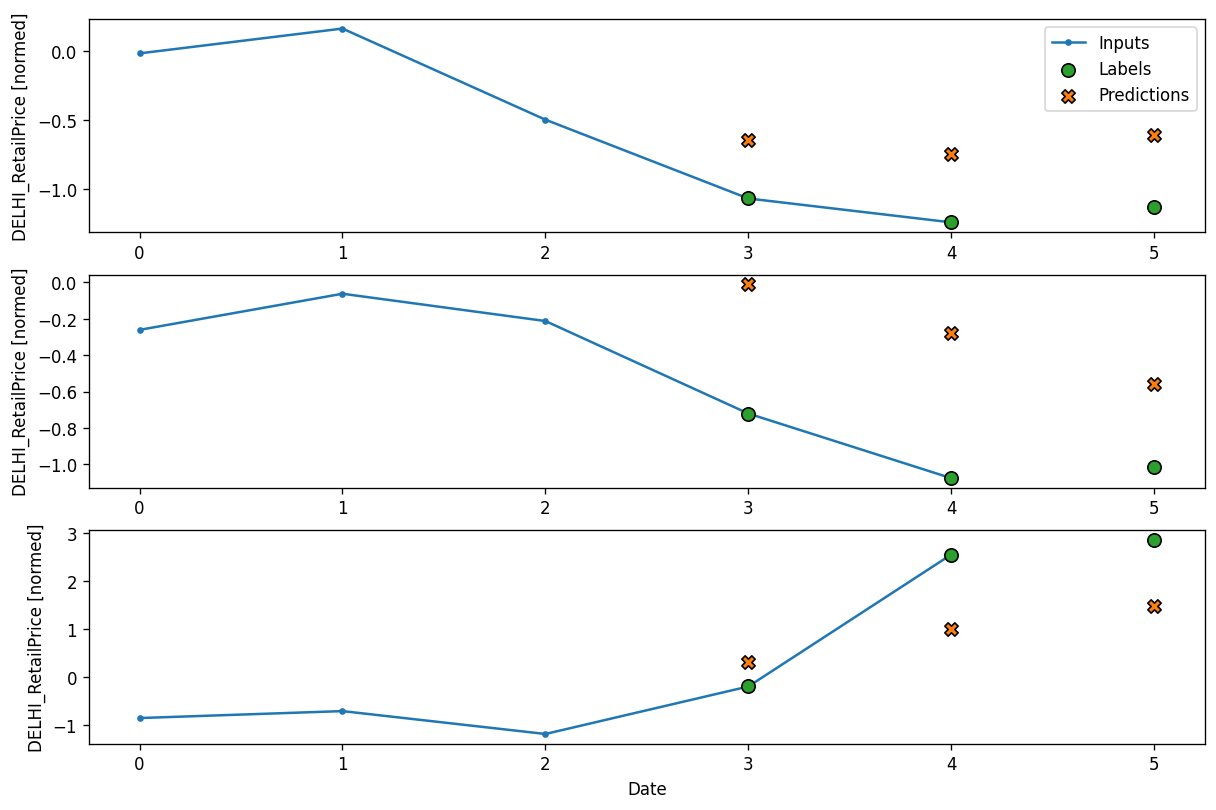

In [66]:
wide_conv_window.plot(conv_model)

In [67]:
# RNN (LSTM)


lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [68]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (32, 3, 3)
Output shape: (32, 3, 1)


In [69]:
history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

1/1 [==============================] - 0s 2ms/step - loss: 0.7406 - mean_absolute_error: 0.7026


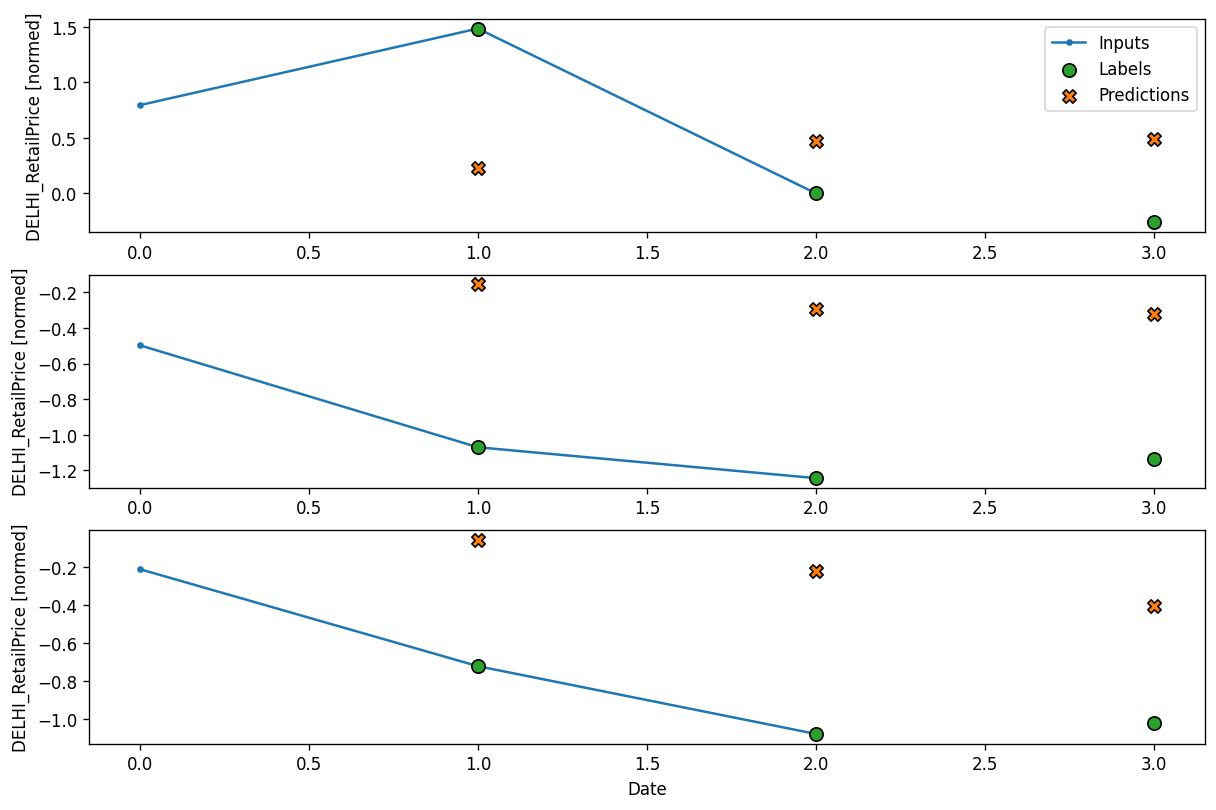

In [70]:
wide_window.plot(lstm_model)

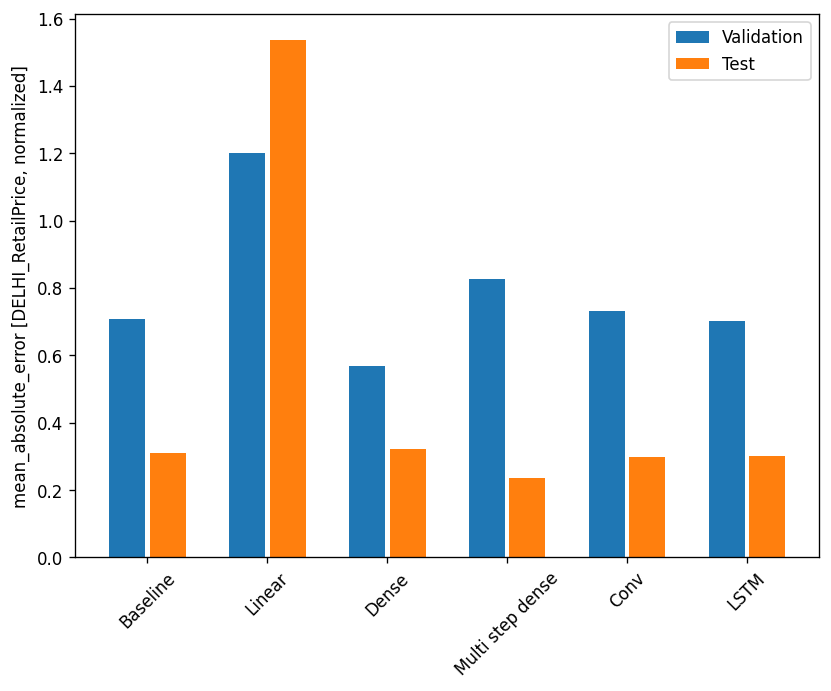

In [71]:
#Performance

x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [DELHI_RetailPrice, normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

In [72]:
for name, value in performance.items():
  print(f'{name:12s}: {value[1]:0.4f}')

Baseline    : 0.3087
Linear      : 1.5370
Dense       : 0.3221
Multi step dense: 0.2368
Conv        : 0.2993
LSTM        : 0.3027


# Multi-Output models

In [73]:
# Multi-output models

single_step_window = WindowGenerator(
    # `WindowGenerator` returns all features as labels if you 
    # don't set the `label_columns` argument.
    input_width=1, label_width=1, shift=1)

wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1)

for example_inputs, example_labels in wide_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (22, 24, 3)
Labels shape (batch, time, features): (22, 24, 3)


In [74]:
# dense

dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=num_features)
])

In [75]:
history = compile_and_fit(dense, single_step_window)

IPython.display.clear_output()
val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

1/1 [==============================] - 0s 2ms/step - loss: 0.7146 - mean_absolute_error: 0.6631


In [76]:
# RNN

%%time
wide_window = WindowGenerator(
    input_width=3, label_width=1, shift=1)

lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=num_features)
])

history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate( wide_window.val)
performance['LSTM'] = lstm_model.evaluate( wide_window.test, verbose=0)

print()

1/1 [==============================] - 0s 2ms/step - loss: 0.8440 - mean_absolute_error: 0.7622

CPU times: user 4.85 s, sys: 289 ms, total: 5.14 s
Wall time: 4.85 s


In [77]:
class ResidualWrapper(tf.keras.Model):
  def __init__(self, model):
    super().__init__()
    self.model = model

  def call(self, inputs, *args, **kwargs):
    delta = self.model(inputs, *args, **kwargs)

    # The prediction for each timestep is the input
    # from the previous time step plus the delta
    # calculated by the model.
    return inputs + delta

In [78]:
%%time
residual_lstm = ResidualWrapper(
    tf.keras.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(
        num_features,
        # The predicted deltas should start small
        # So initialize the output layer with zeros
        kernel_initializer=tf.initializers.zeros)
]))

history = compile_and_fit(residual_lstm, wide_window)

IPython.display.clear_output()
val_performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.val)
performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.test, verbose=0)
print()

1/1 [==============================] - 0s 2ms/step - loss: 1.5125 - mean_absolute_error: 0.9281

CPU times: user 5.28 s, sys: 247 ms, total: 5.52 s
Wall time: 5.22 s


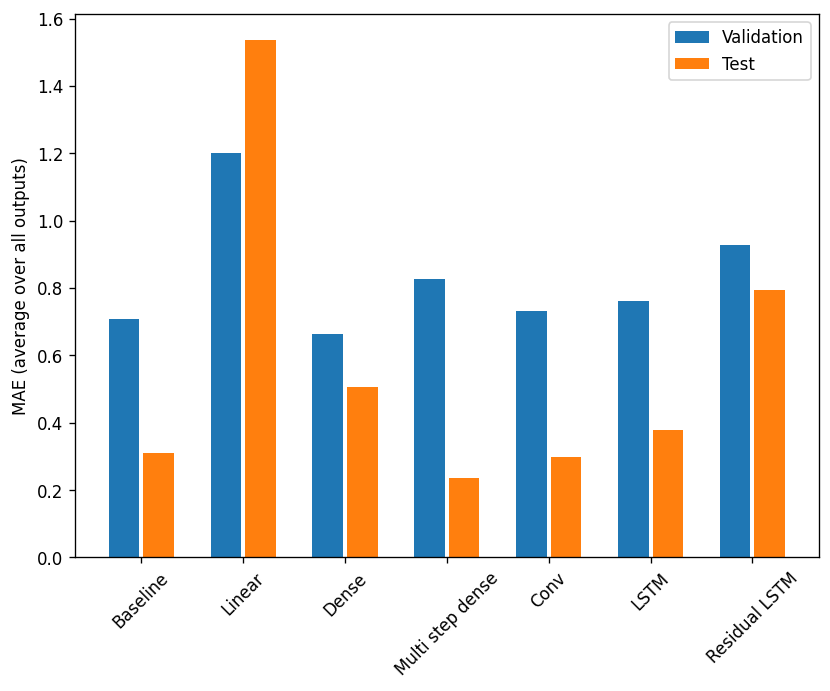

In [79]:
x = np.arange(len(performance))
width = 0.3

metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
plt.ylabel('MAE (average over all outputs)')
_ = plt.legend()

In [80]:
for name, value in performance.items():
  print(f'{name:15s}: {value[1]:0.4f}')

Baseline       : 0.3087
Linear         : 1.5370
Dense          : 0.5052
Multi step dense: 0.2368
Conv           : 0.2993
LSTM           : 0.3770
Residual LSTM  : 0.7943


# Multistep models



Total window size: 14
Input indices: [0 1 2 3 4 5 6 7]
Label indices: [ 8  9 10 11 12 13]
Label column name(s): None

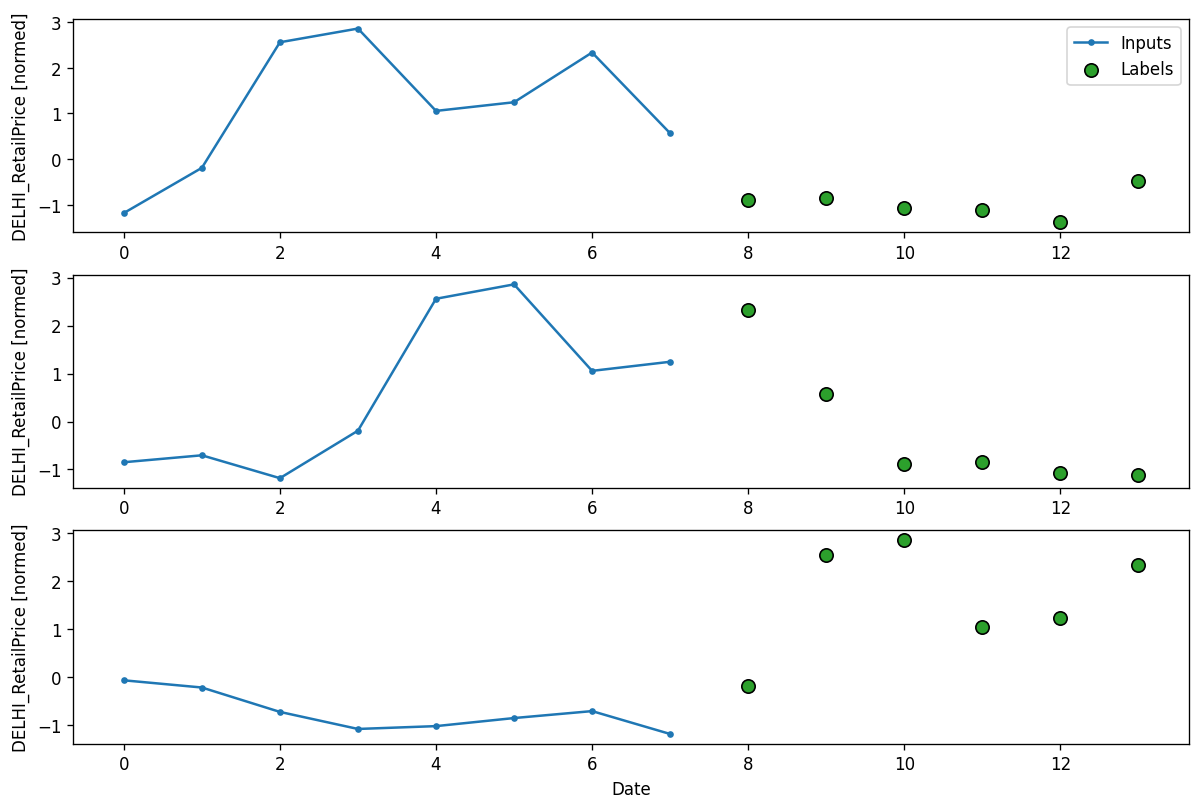

In [81]:
OUT_STEPS = 6
multi_window = WindowGenerator(input_width=8,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

multi_window.plot()
multi_window

1/1 [==============================] - 0s 2ms/step - loss: 2.4287 - mean_absolute_error: 1.3683


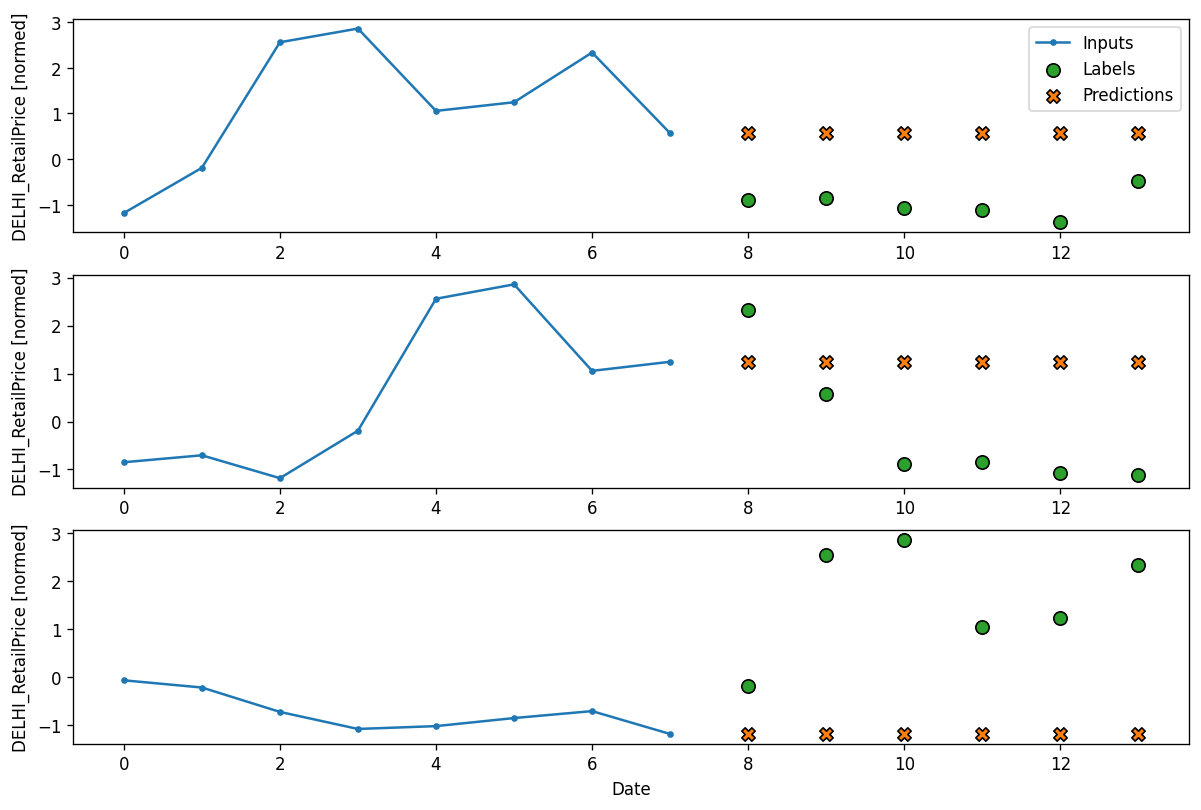

In [82]:
class MultiStepLastBaseline(tf.keras.Model):
  def call(self, inputs):
    return tf.tile(inputs[:, -1:, :], [1, OUT_STEPS, 1])

last_baseline = MultiStepLastBaseline()
last_baseline.compile(loss=tf.losses.MeanSquaredError(),
                      metrics=[tf.metrics.MeanAbsoluteError()])

multi_val_performance = {}
multi_performance = {}

multi_val_performance['Last'] = last_baseline.evaluate(multi_window.val)
multi_performance['Last'] = last_baseline.evaluate(multi_window.val, verbose=0)
multi_window.plot(last_baseline)

1/1 [==============================] - 0s 2ms/step - loss: 0.9349 - mean_absolute_error: 0.7862


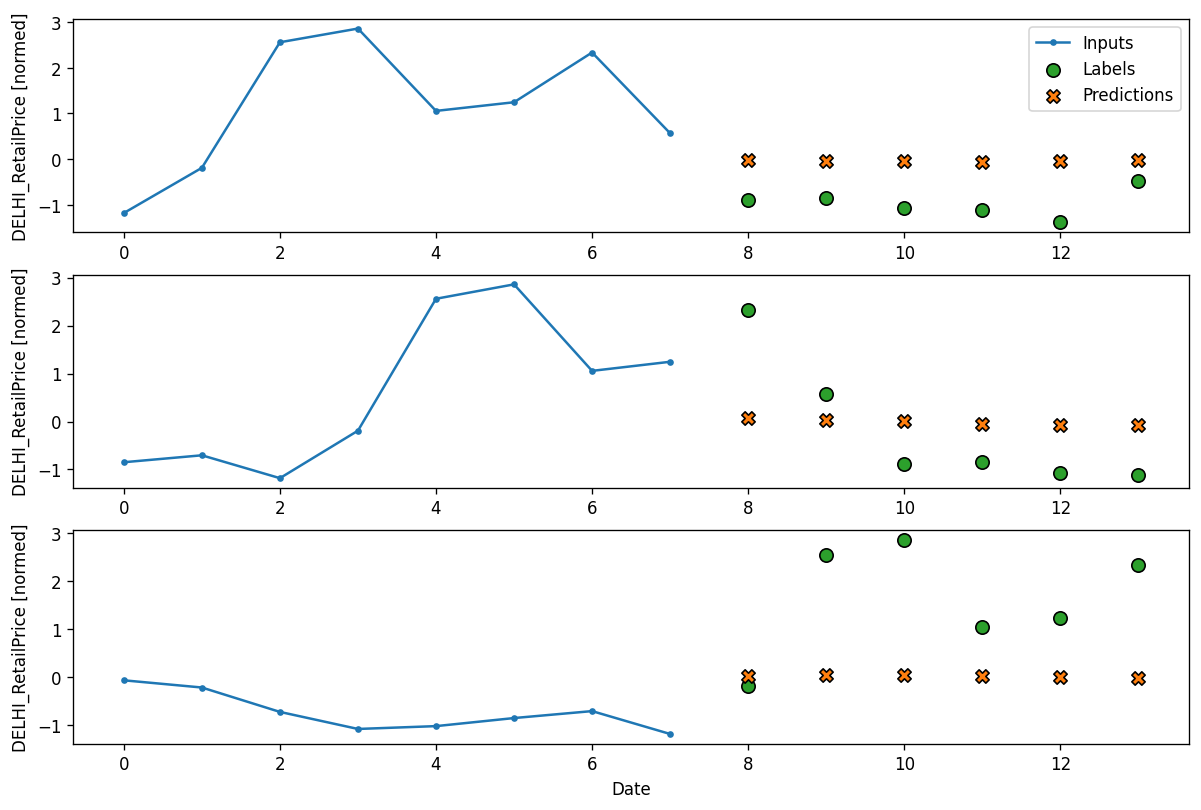

In [83]:
multi_linear_model = tf.keras.Sequential([
    # Take the last time-step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_linear_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Linear'] = multi_linear_model.evaluate(multi_window.val)
multi_performance['Linear'] = multi_linear_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_linear_model)

1/1 [==============================] - 0s 2ms/step - loss: 0.5105 - mean_absolute_error: 0.5431


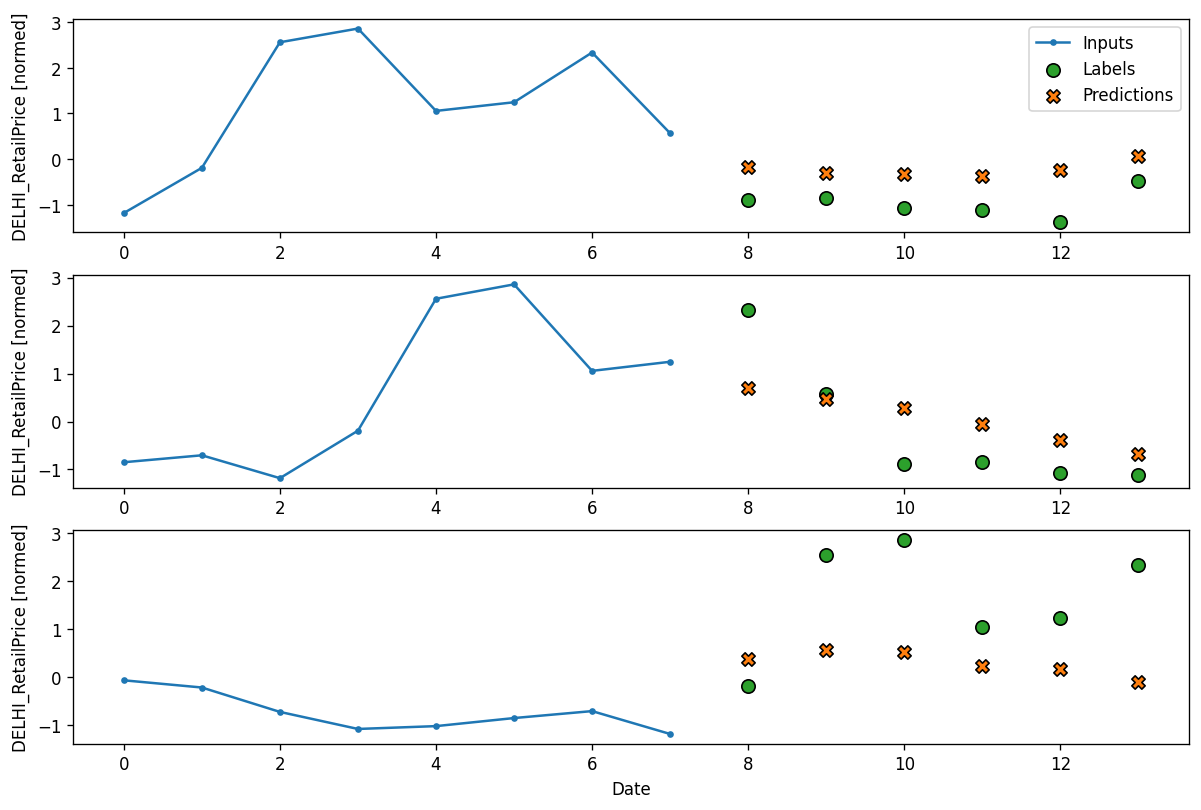

In [84]:
# dense

multi_dense_model = tf.keras.Sequential([
    # Take the last time step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, dense_units]
    tf.keras.layers.Dense(512, activation='relu'),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_dense_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Dense'] = multi_dense_model.evaluate(multi_window.val)
multi_performance['Dense'] = multi_dense_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_dense_model)

1/1 [==============================] - 0s 2ms/step - loss: 0.7975 - mean_absolute_error: 0.7080


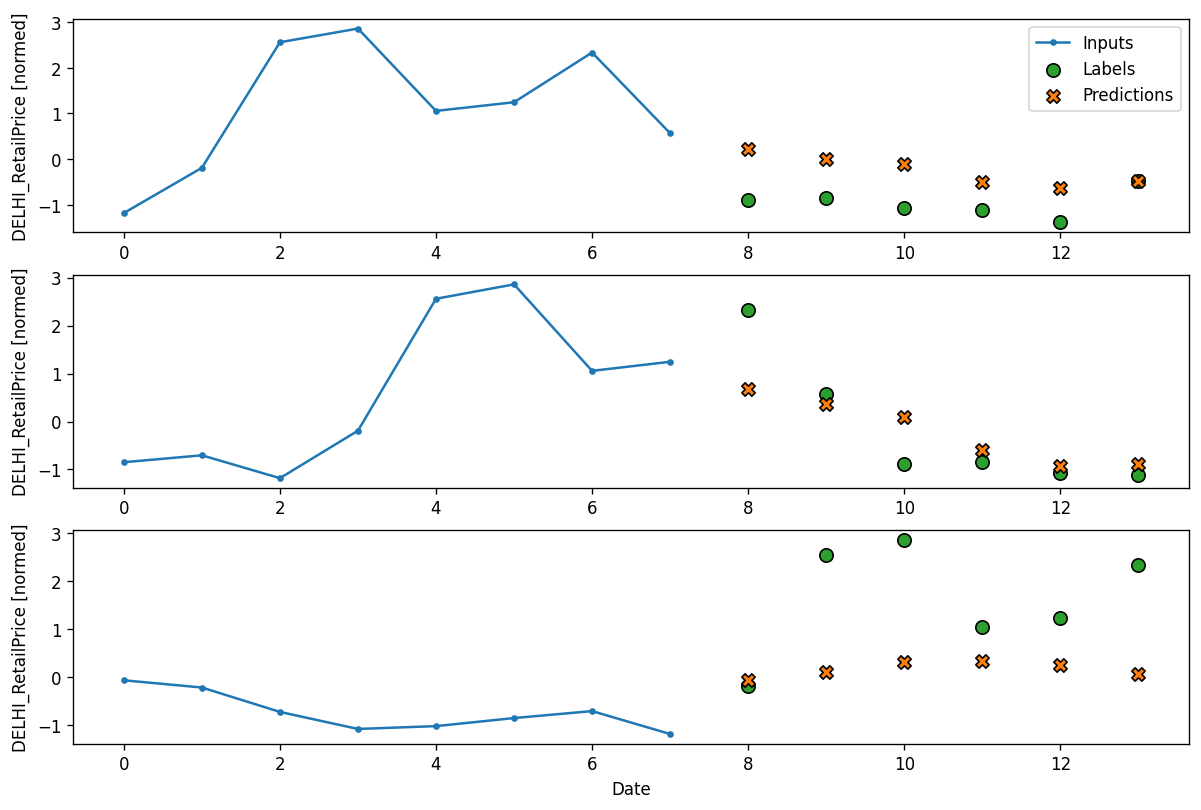

In [85]:
# CNN

CONV_WIDTH = 3
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_conv_model, multi_window)

IPython.display.clear_output()

multi_val_performance['Conv'] = multi_conv_model.evaluate(multi_window.val)
multi_performance['Conv'] = multi_conv_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_conv_model)

1/1 [==============================] - 0s 2ms/step - loss: 0.9825 - mean_absolute_error: 0.8103


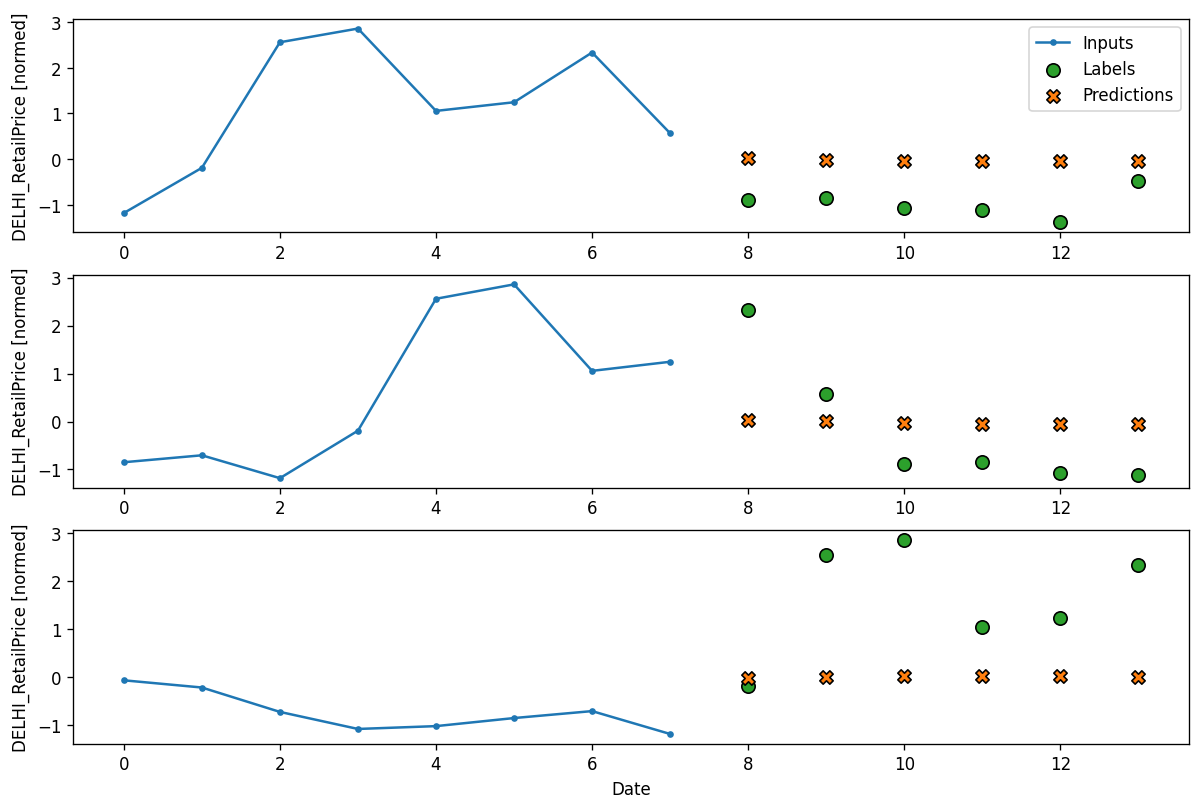

In [86]:
# RNN

multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units]
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)

IPython.display.clear_output()

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.train, verbose=0)
multi_window.plot(multi_lstm_model)

In [87]:
# Autoregressive RNN

class FeedBack(tf.keras.Model):
  def __init__(self, units, out_steps):
    super().__init__()
    self.out_steps = out_steps
    self.units = units
    self.lstm_cell = tf.keras.layers.LSTMCell(units)
    # Also wrap the LSTMCell in an RNN to simplify the `warmup` method.
    self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
    self.dense = tf.keras.layers.Dense(num_features)

In [88]:
feedback_model = FeedBack(units=32, out_steps=OUT_STEPS)

In [89]:
def warmup(self, inputs):
  # inputs.shape => (batch, time, features)
  # x.shape => (batch, lstm_units)
  x, *state = self.lstm_rnn(inputs)

  # predictions.shape => (batch, features)
  prediction = self.dense(x)
  return prediction, state

FeedBack.warmup = warmup

In [90]:
prediction, state = feedback_model.warmup(multi_window.example[0])
prediction.shape

TensorShape([32, 3])

In [91]:
def call(self, inputs, training=None):
  # Use a TensorArray to capture dynamically unrolled outputs.
  predictions = []
  # Initialize the lstm state
  prediction, state = self.warmup(inputs)

  # Insert the first prediction
  predictions.append(prediction)

  # Run the rest of the prediction steps
  for n in range(1, self.out_steps):
    # Use the last prediction as input.
    x = prediction
    # Execute one lstm step.
    x, state = self.lstm_cell(x, states=state,
                              training=training)
    # Convert the lstm output to a prediction.
    prediction = self.dense(x)
    # Add the prediction to the output
    predictions.append(prediction)

  # predictions.shape => (time, batch, features)
  predictions = tf.stack(predictions)
  # predictions.shape => (batch, time, features)
  predictions = tf.transpose(predictions, [1, 0, 2])
  return predictions

FeedBack.call = call

In [92]:
print('Output shape (batch, time, features): ', feedback_model(multi_window.example[0]).shape)

Output shape (batch, time, features):  (32, 6, 3)


1/1 [==============================] - 0s 2ms/step - loss: 1.0387 - mean_absolute_error: 0.8262


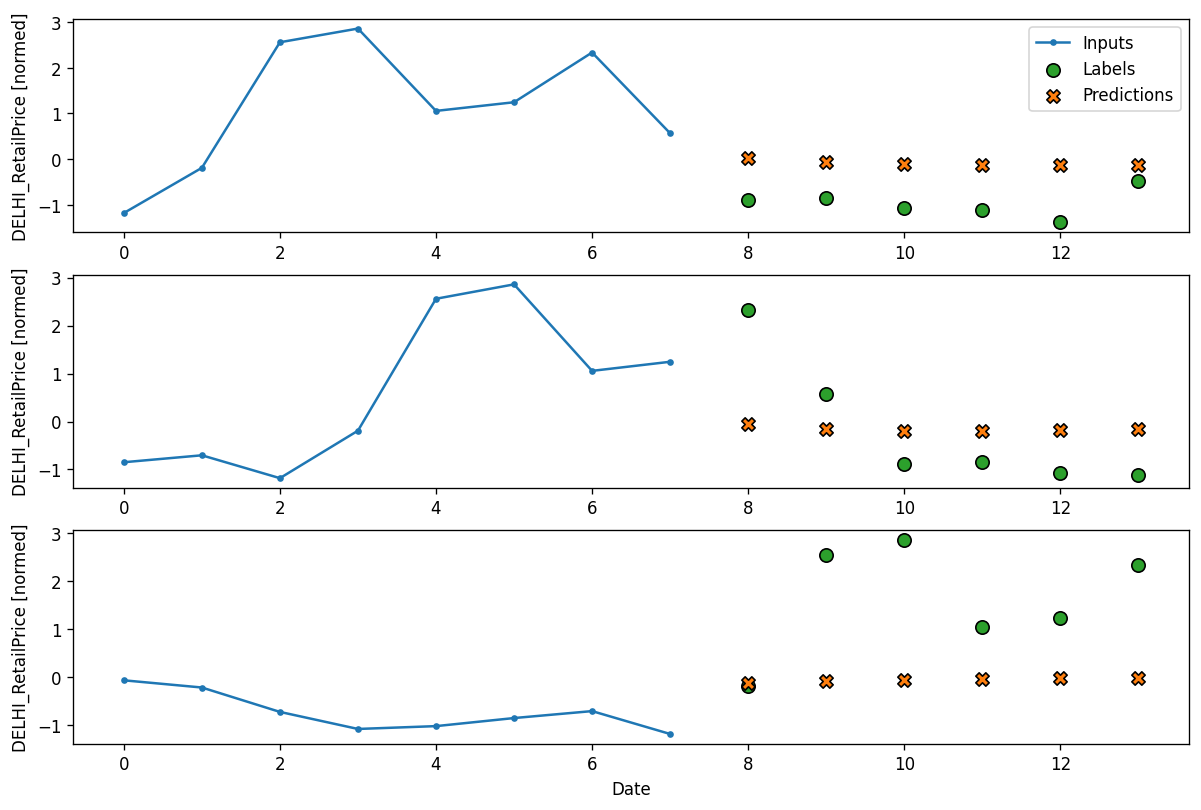

In [93]:
history = compile_and_fit(feedback_model, multi_window)

IPython.display.clear_output()

multi_val_performance['AR LSTM'] = feedback_model.evaluate(multi_window.val)
multi_performance['AR LSTM'] = feedback_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(feedback_model)

# 11. Arima 

In [94]:
sales_data= pd.DataFrame(df5, columns = ['DELHI_RetailPrice'])

In [95]:
sales_data.head()

,DELHI_RetailPrice
2015-01-01,3285.0
2015-02-01,3135.0
2015-03-01,2913.0
2015-04-01,3283.0
2015-05-01,3772.0


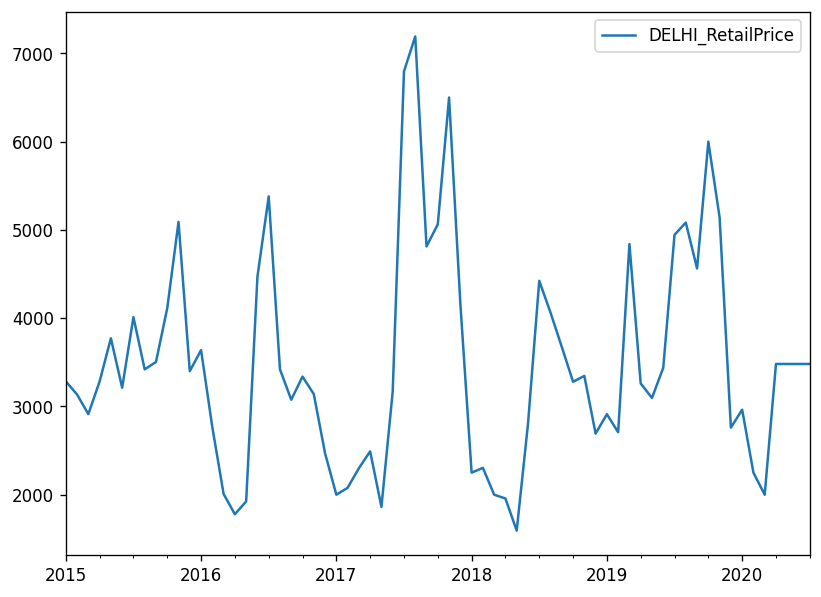

In [96]:
sales_data.plot()

# The series doesn’t look stationary as it is showing an increasing trend. ADF fuller test confirms the null hypothesis. Stationary means mean, variance, and covariance are constant over periods.

In [117]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

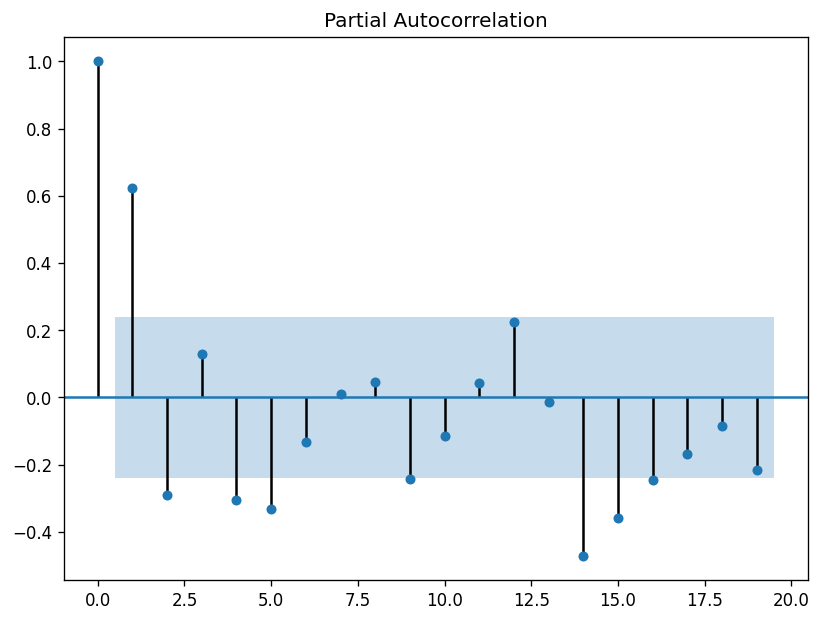

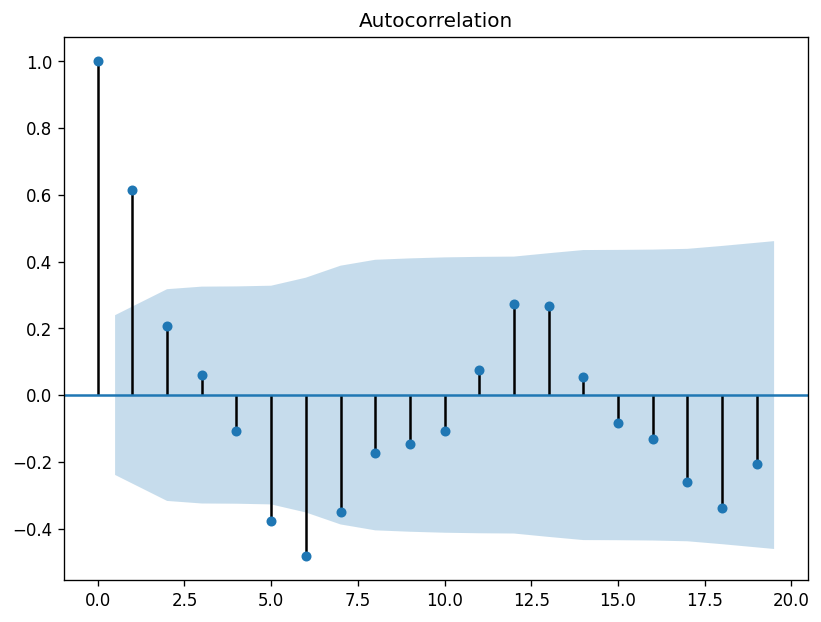

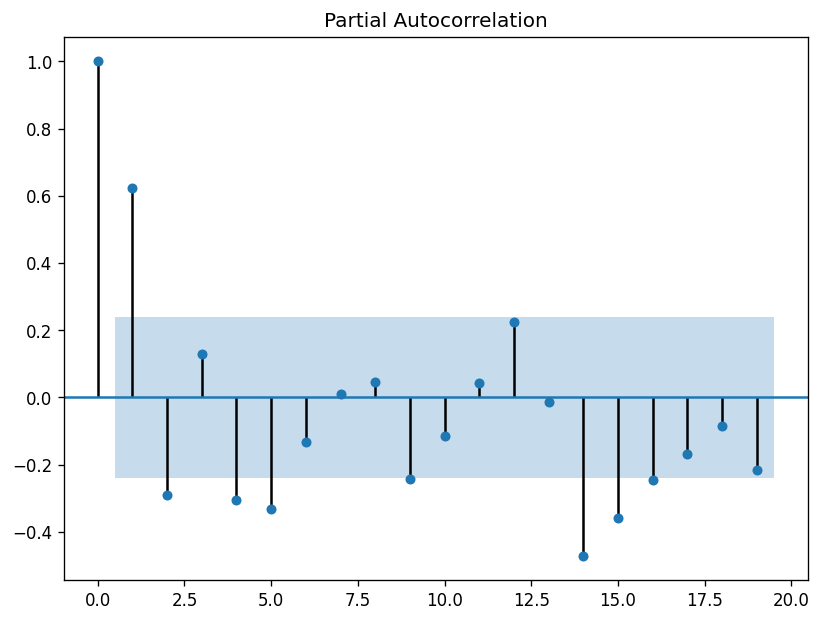

In [118]:
plot_acf(sales_data)
plot_pacf(sales_data)

In [99]:
#define function for ADF test
from statsmodels.tsa.stattools import adfuller

adf_result = stattools.adfuller(sales_data['DELHI_RetailPrice'], autolag='AIC')


In [100]:
print('p-val of the ADF test on irregular variations in employment data:', adf_result[1])

p-val of the ADF test on irregular variations in employment data: 3.366977291419081e-05


# Our p-value is definitely less than 0.5 and is even less than 0.01 so we can say with pretty good confidence that we can reject the null (unit root, non-stationary data) and can assume our data is stationary.

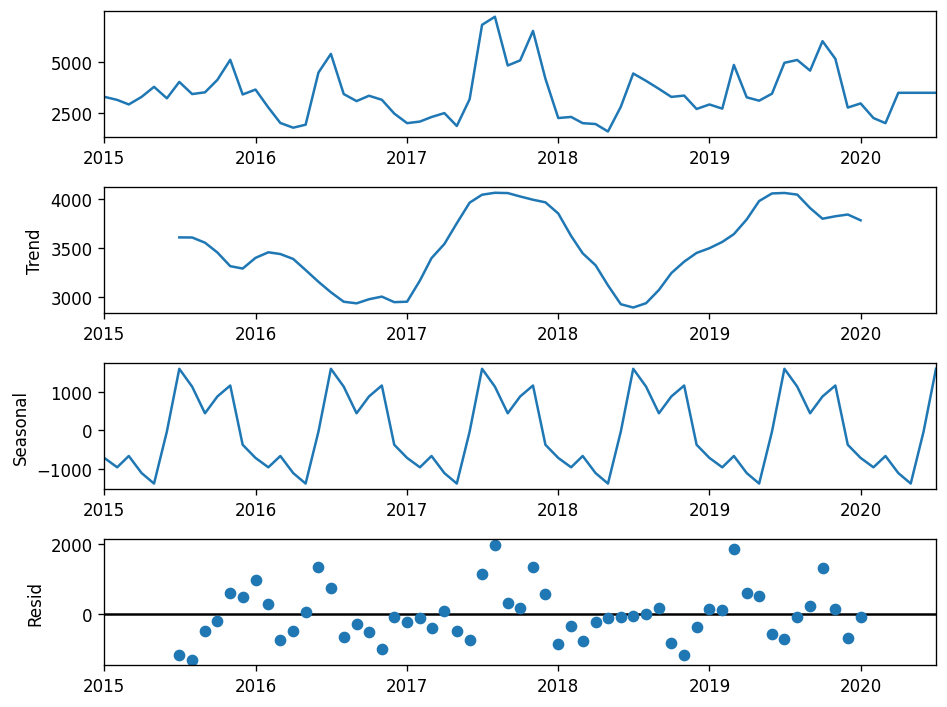

In [101]:
decomposition = sm.tsa.seasonal_decompose(sales_data, model='additive')
decomposition.plot()
plt.show()

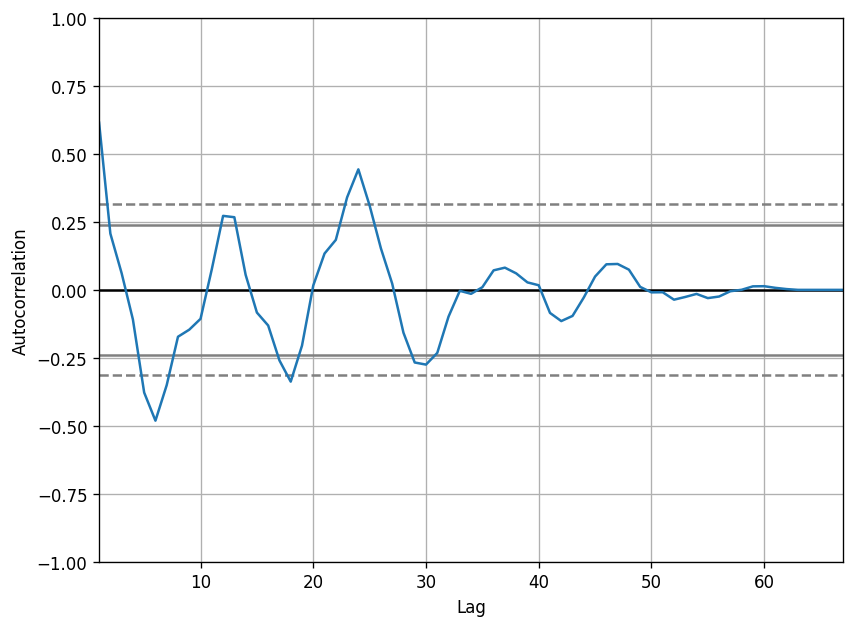

In [102]:
# Auto-correlation plot
autocorrelation_plot(sales_data)
plt.show()

In [103]:
pip install pmdarima

In [104]:
from pmdarima.arima.utils import ndiffs
y = sales_data.DELHI_RetailPrice

## Adf Test
ndiffs(y, test='adf')  # 2



0

In [105]:
# KPSS test
ndiffs(y, test='kpss')  # 0



0

In [106]:
# PP test:
ndiffs(y, test='pp')  # 2

0

In [107]:
# 1,0,1 ARIMA Model
model = ARIMA(sales_data.DELHI_RetailPrice, order=(0,0,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:      DELHI_RetailPrice   No. Observations:                   67
Model:                     ARMA(0, 0)   Log Likelihood                -571.839
Method:                           css   S.D. of innovations           1231.479
Date:                Sun, 13 Sep 2020   AIC                           1147.678
Time:                        12:06:04   BIC                           1152.087
Sample:                    01-01-2015   HQIC                          1149.423
                         - 07-01-2020                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3481.1905    150.449     23.139      0.000    3186.316    3776.065


In [108]:
# 1,1,1 ARIMA Model
model = ARIMA(sales_data.DELHI_RetailPrice, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARIMA Model Results                              
Dep. Variable:     D.DELHI_RetailPrice   No. Observations:                   66
Model:                  ARIMA(1, 1, 1)   Log Likelihood                -553.936
Method:                        css-mle   S.D. of innovations           1068.029
Date:                 Sun, 13 Sep 2020   AIC                           1115.872
Time:                         12:06:04   BIC                           1124.630
Sample:                     02-01-2015   HQIC                          1119.332
                          - 07-01-2020                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         2.1462    146.504      0.015      0.988    -284.997     289.289
ar.L1.D.DELHI_RetailPrice    -0.4687      0.271     -1.732      0.083      -0.

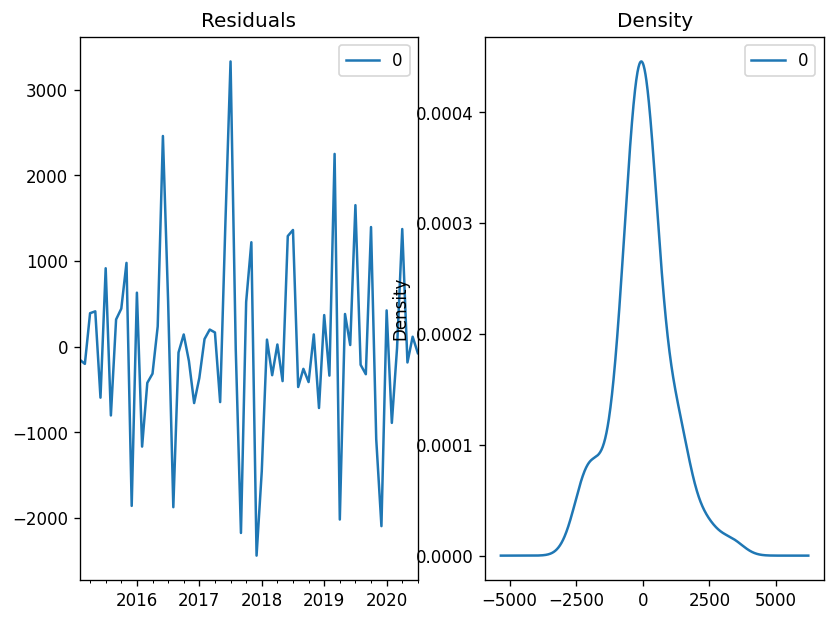

In [109]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

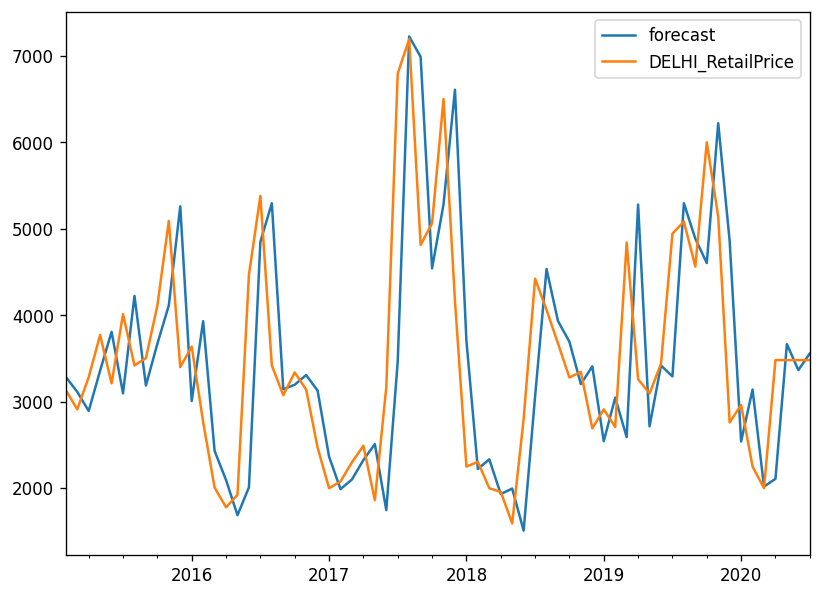

In [110]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

In [111]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = sales_data.DELHI_RetailPrice[:50]
test = sales_data.DELHI_RetailPrice[50:]

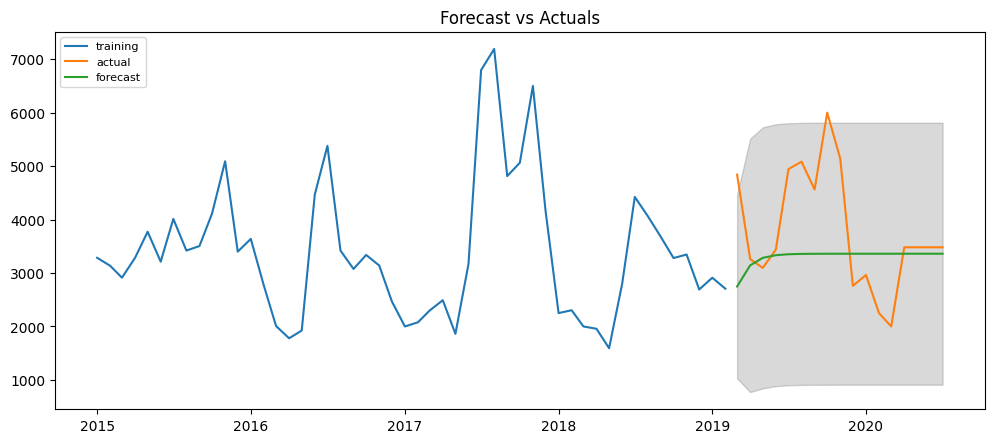

In [112]:
# Build Model
model = ARIMA(train, order=(1, 0, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(17, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [113]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

{'acf1': 0.5178517227643791,
 'corr': -0.179283636302836,
 'mae': 905.5269141063712,
 'mape': 0.23148008061841457,
 'me': -475.15433227182086,
 'minmax': 0.2022435329021699,
 'mpe': -0.044800037314716476,
 'rmse': 1217.3922960994132}

# Mape result implies that our model is 67% accurate in predicting the next 17 observations

# 12. SARIMA model

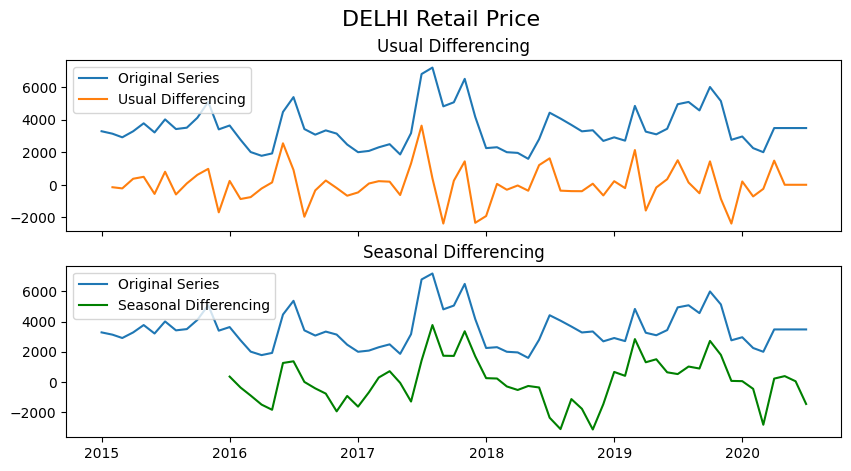

In [114]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(sales_data[:], label='Original Series')
axes[0].plot(sales_data[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot(sales_data[:], label='Original Series')
axes[1].plot(sales_data[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('DELHI Retail Price', fontsize=16)
plt.show()

In [115]:
smodel = pm.auto_arima(sales_data, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=1.10 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=933.351, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=920.788, Time=0.34 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.74 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=934.780, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=922.464, Time=0.98 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.04 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=0.57 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.19 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=918.877, Time=0.10 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=920.489, Time=0.70 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.50 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.33 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=1.59 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=920.597, Time=0.34 sec

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   67
Model:             SARIMAX(0, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -457.438
Date:                            Sun, 13 Sep 2020   AIC                            918.877
Time:                                    12:06:17   BIC                            922.855
Sample:                                         0   HQIC                           920.411
                                             - 67                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.5584      0.139     -4.021      0.000      -0.831      -0.286
sigma2      1.321e+06    2.8e+05      4.716      0.000    7.72e+05    1.87e+06
===================================================================================
Ljung-Box (Q):                       65.33   Jarque-Bera (JB):                 2.10
Prob(Q):                              0.01   Prob(JB):                         0.35
Heteroskedasticity (H):               1.15   Skew:                             0.48
Prob(H) (two-sided):                  0.77   Kurtosis:                         2.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# The model has estimated the AIC and the P values of the coefficients look significant.
# The best model SARIMAX(0, 1, 0)x(1,1, 0, 12) has an AIC of 917.907 and the P Values are significant.

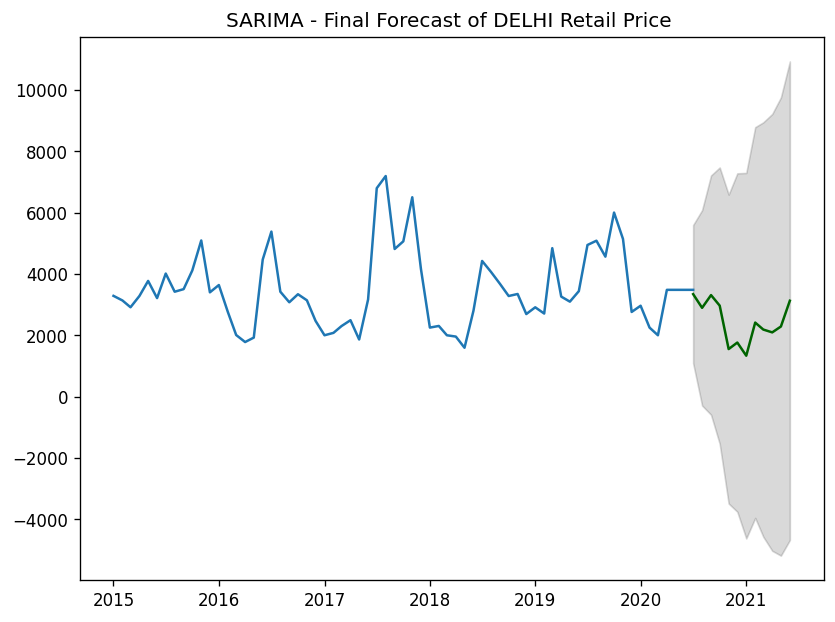

In [116]:
# Forecast
n_periods = 12
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(sales_data.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(sales_data)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of DELHI Retail Price ")
plt.show()